In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans as SklearnKMeans
from models.kmeans.kmeans import KMeans

In [39]:
def test_kmeans(n_samples=300, n_features=2, k=3, visualize=True):
    # Générer données
    X, y_true = make_blobs(n_samples=n_samples, centers=k, n_features=n_features, random_state=42)

    kmeans: KMeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Appliquer ton algo
    centroids, labels = kmeans.centroids, kmeans.labels

    # Vérification dimensions
    assert centroids.shape == (k, n_features)
    assert labels.shape == (n_samples,)

    # Score silhouette
    sil_score = silhouette_score(X, labels)
    print(f"Silhouette score : {sil_score:.3f}")

    # Comparaison avec sklearn
    sk = SklearnKMeans(n_clusters=k, init='random', n_init=1, max_iter=100, random_state=42)
    sk_labels = sk.fit_predict(X)
    rand_index = adjusted_rand_score(sk_labels, labels)
    print(f"Adjusted Rand Index (vs sklearn) : {rand_index:.3f}")

    # Visualisation
    if visualize and n_features == 2:
        plt.figure(figsize=(6, 5))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
        plt.title("Clusters trouvés par ton KMeans")
        plt.show()

    return {
        'silhouette': sil_score,
        'rand_index': rand_index,
        'labels': labels,
        'centroids': centroids
    }


  1%|          | 1/100 [00:00<00:00, 1178.84it/s]

Silhouette score : 0.848
Adjusted Rand Index (vs sklearn) : 1.000


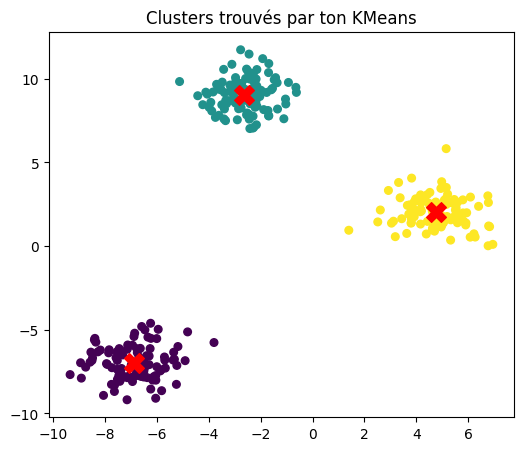

In [41]:
results = test_kmeans(k=3)